# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file ='train.p'
testing_file ='test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Through only a few examples, we can see these data are difficult real-world signs where there might be lighting conditions, motion-blur, sun glare, etc.


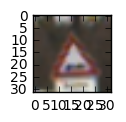

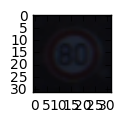

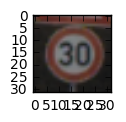

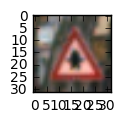

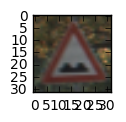

In [3]:
### Data exploration visualization
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# show 5 traffic sign pictures for a frist impression
for i in range(1,6):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

print('Through only a few examples, we can see these data are difficult real-world signs where there might be lighting conditions, motion-blur, sun glare, etc.')

In [4]:
### Data exploration visualization (cont'd)
# count number of each traffic sign    
from collections import Counter
counter=Counter(y_train)
print('Counts for each sign, from #0 to #42 respectively, obviously they are not evenly distributed: ')
print(set(counter.values()))

Counts for each sign, from #0 to #42 respectively, obviously they are not evenly distributed: 
{1410, 390, 780, 270, 2070, 540, 1440, 420, 1320, 2220, 300, 1200, 689, 2100, 1980, 1470, 450, 1860, 2250, 330, 210, 1110, 600, 2010, 1500, 360, 2160, 240, 630, 510}


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I shuffled the data in order to minimize the impact of data ordering on actual training, since I observed the trffaic labels appear in the raw data are unevenly distributed. Also attempts to normalize and grayscale the data didn't improve accuracy, thus abandoned.

In [6]:
### Split the data into training/validation/testing sets.

# use the last 1/20 of shuffled training data as validation set
cut=round(len(X_train)/20)
X_validation, y_validation = X_train[cut:][cut:][cut:][cut:], y_train[cut:][cut:][cut:][cut:]
X_train, y_train           = X_train[:cut][:cut][:cut][:cut], y_train[:cut][:cut][:cut][:cut]

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 

- Training set: the first 19/20 of shuffled data from training file

- Validation set: the last 1/20 of shuffled data from training file 

- Test set: all data from testing file.

In [7]:
### EPOCH and BATCH_SIZE values, affecting the training speed and model accuracy
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128

In [8]:
### Network architecture.
from tensorflow.contrib.layers import flatten

def Mynet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.01
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x108.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 108), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(108))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.tanh(conv1)

    # Pooling. Input = 28x28x108. Output = 14x14x108.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x108.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 108, 108), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(108))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.tanh(conv2)

    # Pooling. Input = 10x10x108. Output = 5x5x108.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x108. Output = 2700.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 2700. Output = 500.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2700, 500), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(500))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.tanh(fc1)

    # Layer 5: Fully Connected. Input = 500. Output = 43.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(500, 43), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc1, fc2_W) + fc2_b
    
    return logits

In [9]:
###Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [10]:
###Training Pipeline
rate = 0.0005

logits = Mynet(x)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [11]:
###Model Evaluation definition
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The final network architecture consists of: 
- 1st conv layer with 108 features
- 2nd conv layer with 108 features
- one full connected layer to the output, with one flattened input, from 2700 to 500
- tanh activation functions after each layer
- two max pooling after each conv layer
- filter size of 5x5 with stride 1x1

In [12]:
### Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'p1')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.129

EPOCH 2 ...
Validation Accuracy = 0.164

EPOCH 3 ...
Validation Accuracy = 0.275

EPOCH 4 ...
Validation Accuracy = 0.346

EPOCH 5 ...
Validation Accuracy = 0.467

EPOCH 6 ...
Validation Accuracy = 0.575

EPOCH 7 ...
Validation Accuracy = 0.682

EPOCH 8 ...
Validation Accuracy = 0.791

EPOCH 9 ...
Validation Accuracy = 0.848

EPOCH 10 ...
Validation Accuracy = 0.877

EPOCH 11 ...
Validation Accuracy = 0.907

EPOCH 12 ...
Validation Accuracy = 0.913

EPOCH 13 ...
Validation Accuracy = 0.927

EPOCH 14 ...
Validation Accuracy = 0.929

EPOCH 15 ...
Validation Accuracy = 0.937

EPOCH 16 ...
Validation Accuracy = 0.943

EPOCH 17 ...
Validation Accuracy = 0.944

EPOCH 18 ...
Validation Accuracy = 0.944

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.950

EPOCH 21 ...
Validation Accuracy = 0.949

EPOCH 22 ...
Validation Accuracy = 0.949

EPOCH 23 ...
Validation Accuracy = 0.951

EPOCH 24 ...
Validation Accura

In [13]:
### Show test accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # accuracy on test set
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.915


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
- optimizer: AdamOptimizer
- batch size: 128
- epochs: 40
- mean and stddev for prior weights generation: 0 and 0.01
- learning rate: 0.0005

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Generally, I started off from LeNet-5 lab, tried all sorts of alterations of hypterparameters, otpimizer, structures, etc, but only acheived 0.77 accuracy, so I simply gave it up. Then I started to read a couple of published paper of on this specific task, and got inspariations from Pierre Sermanet and Yann LeCun's "Traffic Sign Recognition with Multi-Scale Convolutional Networks". However, there are tons of parameters and configurations they hide in this paper, so I took some time to figure out a best result of my capability. 

Concisesly, the attemps I tried are as follows:
- LeNet-5 + AdamOptimizer	40 epochs	0.77    sigma=0.1     rate=0.001    
- LeNet-5 + AdamOptimizer	40 epochs	0.71	sigma=0.1     rate=0.0005         
- LeNet-5 + SGD			    40 epochs 	0.055   sigma=0.1     rate=0.001
- LeNet-5 + Momentum		40 epochs	0.11    sigma=0.1     rate=0.001

Then I'm done with LeNet, began my own designs:

- Mynet + AdamOptimizer		40 epochs	0.81	sigma=0.05    rate=0.001    38,64         activation:ReLU
- Mynet + AdamOptimizer		40 epochs	0.88	sigma=0.01    rate=0.001    38,64         activation:ReLU
- Mynet + AdamOptimizer		40 epochs	0.87	sigma=0.01	  rate=0.001    38,64         activation:ReLU       batchsize=256
- Mynet + AdamOptimizer		40 epochs	0.91	sigma=0.01	  rate=0.0005	38,64	      activation:ReLU
- Mynet + AdamOptimizer		40 epochs	0.92	sigma=0.01	  rate=0.0005	108,108       activation:ReLU
- Mynet + AdamOptimizer		40 epochs	0.95	sigma=0.01	  rate=0.0005	108,108		  activation:tanh
- Mynet + AdamOptimizer		40 epochs	0.86	sigma=0.01	  rate=0.0005	108,108		  activation:tanh		2 x dropout 0.5

After a few experiments, I figured out the best configuration, and adding dropout between any layers does not increase accuracy. 

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

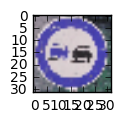

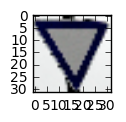

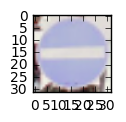

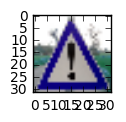

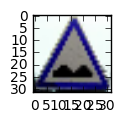

In [14]:
### Load the new images and plot them.
import cv2

new_images=[]
# manually add 5 new labels
new_labels=[9,13,17,18,22]
    
# manually add 5 new images
new_image=cv2.imread('9.jpg')
new_image=cv2.resize(new_image, (32, 32)) 
new_images.append(new_image)

new_image=cv2.imread('13.jpg')
new_image=cv2.resize(new_image, (32, 32)) 
new_images.append(new_image)
    
new_image=cv2.imread('17.jpg')
new_image=cv2.resize(new_image, (32, 32)) 
new_images.append(new_image)
    
new_image=cv2.imread('18.jpg')
new_image=cv2.resize(new_image, (32, 32)) 
new_images.append(new_image)
    
new_image=cv2.imread('22.jpg')
new_image=cv2.resize(new_image, (32, 32)) 
new_images.append(new_image)
    
    # plot new images
for im in new_images:
    plt.figure(figsize=(1,1))
    plt.imshow(im)    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Images are acquired from screenshots of virtually walking in German streets in Google earth. The first image has relatively complicated patterns, which could potentially be a touch one for the CNN, and the third is a bit worn out and the color is shollow. Otherwise, should't be a problem for the classifier.

P.S. due to the color space problem of my snapping/cutting tool, the images displayed out are blue. I really lack of enough knowledge of color space, but apparently it doesn't affect classification.

In [15]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
    
#print(predictions[:43])
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    new_accuracy = evaluate(new_images, new_labels)
    print("New Accuracy = {:.3f}".format(new_accuracy))

New Accuracy = 0.600


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** My model achieved 60% accuracy, namely got 3 correct predictions out of 5 for such a mini test set. As expected, the 1st and 3rd sign are mis-classified. The first one has compilicated patterns while the third is worn out.

In [16]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # get softmax probablity 
    prediction=tf.nn.softmax(logits) 
    predictions = sess.run(prediction, feed_dict={x: new_images})
    
    # visualize the certainty of predictions
    print(sess.run(tf.nn.top_k(tf.constant(np.array(predictions)), k=3)) )

TopKV2(values=array([[  4.31237340e-01,   2.45777830e-01,   6.80081472e-02],
       [  9.99144554e-01,   2.73745594e-04,   1.48749037e-04],
       [  7.19420493e-01,   5.32744601e-02,   4.93838042e-02],
       [  4.23976004e-01,   1.40563533e-01,   1.35089964e-01],
       [  7.41104007e-01,   1.71638414e-01,   2.36951951e-02]], dtype=float32), indices=array([[12, 42, 11],
       [13, 38,  3],
       [12, 33, 35],
       [18, 26, 11],
       [22, 15, 25]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** The top three possible labels and probabilities for each image are, as shown in the last code cell:
- image 1: [12, 42, 11] with probability [0.43, 0.25,   0.06].   Actual label is 9. Wrong prediction. 
- image 2: [13, 38, 3] with probability [0.99, 0.0003, 0.0002]. Actual label is 13. Correct prediction. 
- image 3: [12, 33, 35] with probability [0.72, 0.05, 0.05].     Actual label is 17. Wrong prediction. 
- image 4: [18, 26, 11] with probability [0.42, 0.14, 0.13].     Actual label is 18. Correct prediction. 
- image 5: [22, 15, 25] with probability [0.74, 0.17, 0.02].     Actual label is 22. Correct prediction. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.